In [46]:
# Imports for data analysis
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from datetime import datetime


In [47]:
# read csv
df_crash = pd.read_csv("../Resources/combined_data.csv")
df_crash = df_crash.sort_values(by = "Case Date")
df_crash.head()

/var/folders/zy/55ss7q015wg6ljyvf2xsx9dw0000gn/T/ipykernel_90996/1150434435.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_crash = pd.read_csv("../Resources/combined_data.csv")


,St Case Num,Age,Sex,Race,Seat Pos,AirBag Deployed,Is Fatal,Is Drug,Is Drunk,BAC,Case Date,Make Name,Model Name,Model Year,State,County
15,450001,27,1,Not a Fatality (not Applicable),"Second Seat, Right Side",False,False,Not Reported,Not Reported,Test Not Given,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43)
17,130001,54,2,White,"Front Seat, Left Side",True,True,No (drugs not involved),No (Alcohol Not Involved),Test Not Given,2017-01-01,Chevrolet,Chevrolet Cobalt,2008,Georgia,BARROW (13)
4,310001,999,9,Not a Fatality (not Applicable),"Front Seat, Left Side",True,False,Unknown,Unknown (Police Reported),Test Not Given,2017-01-01,Unknown Make,"Unknown Make Unknown (as to automobile, motore...",9999,Nebraska,SCOTTS BLUFF (157)
5,480010,20,1,White,"Front Seat, Left Side",False,True,Not Reported,Not Reported,Test Not Given,2017-01-01,Chevrolet,Chevrolet S-10/T-10 Pickup,2000,Texas,ROBERTSON (395)
6,480006,25,1,White,"Front Seat, Left Side",False,True,No (drugs not involved),Yes (Alcohol Involved),0.182 % BAC,2017-01-01,Ford,Ford Mustang/Mustang II,2004,Texas,JOHNSON (251)


In [48]:
#check length of csv
len(df_crash)

188221

In [49]:
df_crash["Case Year"] = df_crash["Case Date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').strftime("%Y"))
df_crash.head()

,St Case Num,Age,Sex,Race,Seat Pos,AirBag Deployed,Is Fatal,Is Drug,Is Drunk,BAC,Case Date,Make Name,Model Name,Model Year,State,County,Case Year
15,450001,27,1,Not a Fatality (not Applicable),"Second Seat, Right Side",False,False,Not Reported,Not Reported,Test Not Given,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43),2017
17,130001,54,2,White,"Front Seat, Left Side",True,True,No (drugs not involved),No (Alcohol Not Involved),Test Not Given,2017-01-01,Chevrolet,Chevrolet Cobalt,2008,Georgia,BARROW (13),2017
4,310001,999,9,Not a Fatality (not Applicable),"Front Seat, Left Side",True,False,Unknown,Unknown (Police Reported),Test Not Given,2017-01-01,Unknown Make,"Unknown Make Unknown (as to automobile, motore...",9999,Nebraska,SCOTTS BLUFF (157),2017
5,480010,20,1,White,"Front Seat, Left Side",False,True,Not Reported,Not Reported,Test Not Given,2017-01-01,Chevrolet,Chevrolet S-10/T-10 Pickup,2000,Texas,ROBERTSON (395),2017
6,480006,25,1,White,"Front Seat, Left Side",False,True,No (drugs not involved),Yes (Alcohol Involved),0.182 % BAC,2017-01-01,Ford,Ford Mustang/Mustang II,2004,Texas,JOHNSON (251),2017


In [50]:
print(len(df_crash.groupby(["Case Year", "St Case Num", "State"])))

133316


<h1>1. Gender Analysis</h1>

In [51]:
#checking values
df_crash["Sex"].value_counts()

Sex
1    125605
2     57720
9      3376
8      1520
Name: count, dtype: int64

In [52]:
# remove the unknown and weird numbers
df_crash = df_crash[(df_crash["Sex"] == 1) | (df_crash["Sex"] == 2)]

#convert sex names to actual names, male = 1, female = 2
df_crash.loc[:, "Sex"] = df_crash["Sex"].replace({1: "Male", 2: "Female"})
df_crash.head()

/var/folders/zy/55ss7q015wg6ljyvf2xsx9dw0000gn/T/ipykernel_90996/1245826018.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Male' 'Female' 'Male' ... 'Male' 'Male' 'Female']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_crash.loc[:, "Sex"] = df_crash["Sex"].replace({1: "Male", 2: "Female"})


,St Case Num,Age,Sex,Race,Seat Pos,AirBag Deployed,Is Fatal,Is Drug,Is Drunk,BAC,Case Date,Make Name,Model Name,Model Year,State,County,Case Year
15,450001,27,Male,Not a Fatality (not Applicable),"Second Seat, Right Side",False,False,Not Reported,Not Reported,Test Not Given,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43),2017
17,130001,54,Female,White,"Front Seat, Left Side",True,True,No (drugs not involved),No (Alcohol Not Involved),Test Not Given,2017-01-01,Chevrolet,Chevrolet Cobalt,2008,Georgia,BARROW (13),2017
5,480010,20,Male,White,"Front Seat, Left Side",False,True,Not Reported,Not Reported,Test Not Given,2017-01-01,Chevrolet,Chevrolet S-10/T-10 Pickup,2000,Texas,ROBERTSON (395),2017
6,480006,25,Male,White,"Front Seat, Left Side",False,True,No (drugs not involved),Yes (Alcohol Involved),0.182 % BAC,2017-01-01,Ford,Ford Mustang/Mustang II,2004,Texas,JOHNSON (251),2017
12,450001,36,Male,Not a Fatality (not Applicable),"Front Seat, Left Side",False,False,Not Reported,Not Reported,Not Reported,2017-01-01,Cadillac,Cadillac CTS/CTC,2003,South Carolina,GEORGETOWN (43),2017


In [53]:
#Check Race Values
print(df_crash["Race"].value_counts())
df_crash["Race"].isna().sum()

Race
Not a Fatality (not Applicable)                                                                   23499
White                                                                                             15702
Black                                                                                              3105
Unknown                                                                                             764
American Indian (includes Alaska Native)                                                            336
All other races                                                                                     278
Other Asian or Pacific Islander                                                                      83
Asian Indian                                                                                         75
Filipino                                                                                             57
Multiple Races (individual races not specified; ex. "mixed"

139137

A lot of the races are NaN. Not useful data.

<h1>2. SEAT POSITION ANALYSIS </h1>


In [54]:
#checking values 
df_crash["Seat Pos"].value_counts()

#only keeps the ones that have a lot of data
df_seat_pos = df_crash[(df_crash["Seat Pos"] == "Front Seat, Left Side")|
                        (df_crash["Seat Pos"] == "Front Seat, Right Side")|
                        (df_crash["Seat Pos"] == "Second Seat, Left Side")|
                        (df_crash["Seat Pos"] == "Second Seat, Right Side")|
                        (df_crash["Seat Pos"] == "Second Seat, Middle")
                       ][["Seat Pos","Is Fatal"]].copy()
df_seat_pos.head()

,Seat Pos,Is Fatal
15,"Second Seat, Right Side",False
17,"Front Seat, Left Side",True
5,"Front Seat, Left Side",True
6,"Front Seat, Left Side",True
12,"Front Seat, Left Side",False


<h3> 2a. Fatality vs. Seat Position </h3>

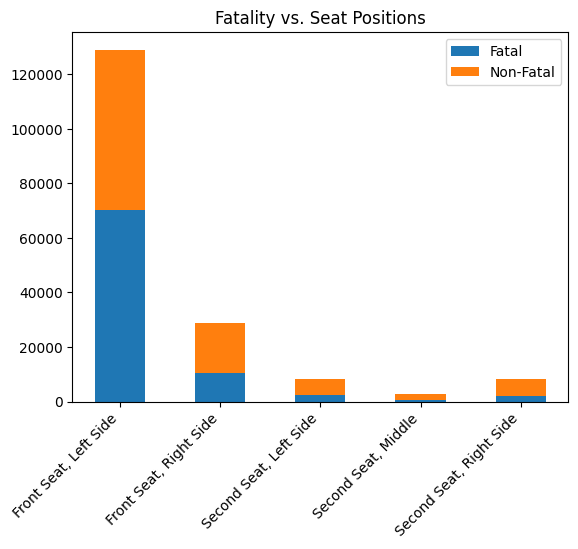

In [55]:
#x labels for bar plot
x_labels = df_seat_pos["Seat Pos"].unique()
x_labels.sort()

#get the counts of fatal and non fatal for each seat position
y_data = {
    "Fatal": [len(df_seat_pos[(df_seat_pos["Seat Pos"] == pos) & (df_seat_pos["Is Fatal"] == True)]) for pos in x_labels],
    "Non-Fatal": [len(df_seat_pos[(df_seat_pos["Seat Pos"] == pos) & (df_seat_pos["Is Fatal"] == False)]) for pos in x_labels]
}

width = 0.5
fig, ax = plt.subplots()
bottom = np.zeros(5)

for boolean, counts in y_data.items():
    ax.bar(x_labels, counts, width, label = boolean, bottom = bottom)
    bottom += counts

plt.xticks(rotation = 45, ha='right')
plt.title("Fatality vs. Seat Positions")
plt.legend(loc = "upper right")
plt.show()


<h3>2b. Chisquare Test of Homogeneity for Proportions</h3>

In [61]:
# Here, we want to see if the proportion of survival/fatality rates are the same.
# Null hypothesis: The survival rate is the same across the different seat positions
# Alternate Hypothesis: The survival rate is different across the different seat positions

observed = [
    y_data["Fatal"],
    y_data["Non-Fatal"]
]

# Expected value calculations
total = sum(x for x in y_data["Fatal"]) + sum(x for x in y_data["Non-Fatal"])
row_totals = [sum(x for x in y_data[key]) for key in y_data.keys()]
column_totals = [y_data["Fatal"][i] + y_data["Non-Fatal"][i]  for i in range(len(y_data["Fatal"]))]

expected = []

for i in range(len(observed)):
    row = []
    for j in range(len(observed[0])):
        row.append(row_totals[i] * column_totals[j]/total)
    expected.append(row)

print(observed)
print(expected)

results = st.chi2_contingency(observed)
results.expected_freq

[[70361, 10429, 2358, 592, 1998], [58625, 18353, 5911, 2150, 6174]]
[[62497.53699046629, 13945.731394566857, 4006.5753909274317, 1328.5802058196903, 3959.576018219733], [66488.46300953372, 14836.268605433143, 4262.424609072568, 1413.4197941803097, 4212.423981780267]]


array([[62497.53699047, 13945.73139457,  4006.57539093,  1328.58020582,
         3959.57601822],
       [66488.46300953, 14836.26860543,  4262.42460907,  1413.41979418,
         4212.42398178]])